In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#### les styles matplotlib
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
#### importation de données
cols = ['user_id', 'item_id', 'rating', 'timestamp']
path = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat"
ratings = pd.read_csv(path, sep = '::', index_col=False, names=cols, encoding="UTF-8")

C:\Users\33753\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [5]:
ratings.head()

,user_id,item_id,rating,timestamp
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524


In [16]:
rating_counts = ratings.rating.value_counts()
rating_counts

8     222146
7     206680
9     130106
6     120370
10    108351
5      69747
4      28193
3      15487
1      10814
2       9223
0        281
Name: rating, dtype: int64

In [20]:
sorted_counts = rating_counts.sort_index(axis = 0)
sorted_counts[:100]

0        281
1      10814
2       9223
3      15487
4      28193
5      69747
6     120370
7     206680
8     222146
9     130106
10    108351
Name: rating, dtype: int64

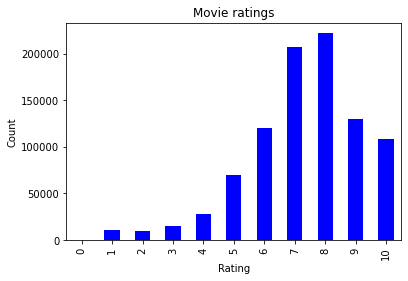

In [22]:
sorted_counts[:100].plot(kind = 'bar', color = "blue") 
plt.title('Movie ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [23]:
movies[:5]


NameError: name 'movies' is not defined

In [24]:
path2 = "https://raw.githubusercontent.com/PacktPublishing/Mastering-Python-Data-Analysis/master/Chapter%201/data/movies.dat"
cols = ['movie_id', 'item_title', 'genre']
movies = pd.read_csv(path2, sep = '::', index_col=False, names=cols, encoding="UTF-8")

C:\Users\33753\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [25]:
movies.head()

,movie_id,item_title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,7264,The Rink (1916),Comedy|Short
3,8133,The Immigrant (1917),Short|Comedy|Drama|Romance
4,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance


In [26]:
drama = movies[movies['genre'] == 'Crime|Drama']
drama

,movie_id,item_title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
54,23817,Blondie Johnson (1933),Crime|Drama
208,40522,Ladri di biciclette (1948),Crime|Drama
236,42876,Rashômon (1950),Crime|Drama
251,44515,Cosh Boy (1953),Crime|Drama
...,...,...,...
6881,2062969,L'enfant d'en haut (2012),Crime|Drama
7038,2132285,The Bling Ring (2013),Crime|Drama
7047,2139919,Gimme the Loot (2012),Crime|Drama
7195,2271519,Ôgon o daite tobe (2012),Crime|Drama


In [28]:
drama_ids = drama['movie_id']
drama_ids

0          2844
54        23817
208       40522
236       42876
251       44515
         ...   
6881    2062969
7038    2132285
7047    2139919
7195    2271519
7198    2275671
Name: movie_id, Length: 102, dtype: int64

In [29]:
ratings.item_id

0          114508
1          499549
2         1305591
3         1428538
4           75314
           ...   
921393    9893250
921394    9898858
921395     172495
921396     414387
921397    1623205
Name: item_id, Length: 921398, dtype: int64

In [33]:
criterion = ratings.item_id.map(lambda x: (drama_ids == x).any())

In [37]:
drama_ratings = ratings[criterion]

In [40]:
drama_ratings[:2]

,user_id,item_id,rating,timestamp
4,3,75314,1,1595468524
115,31,68646,10,1381651760


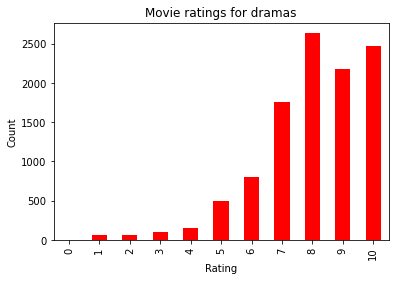

In [41]:
rating_counts = drama_ratings['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
sorted_counts.plot(kind='bar', color = 'red')
plt.title('Movie ratings for dramas')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [53]:
gss_data = pd.read_stata('./GSS2012merged_R5.dta', convert_categoricals=False)
gss_data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,1,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,3,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,4,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
gss_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4820 entries, 0 to 4819
Columns: 1069 entries, year to enprbfam
dtypes: float64(1037), int16(7), int8(25)
memory usage: 38.4 MB


In [56]:
gss_data.set_index('id', inplace = True)
#gss_data.drop('id', 1, inplace = True)

In [57]:
gss_data

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,marital,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
id,,,,,,,,,,,,,,,,,,,,,
1,2012,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,2012,5.0,NaN,NaN,1.0,2.0,2.0,9030.0,6070.0,1.0,...,4.0,NaN,2.0,2.0,1.0,2.0,2.0,NaN,5.0,3.0
11548,2012,5.0,NaN,NaN,1.0,2.0,2.0,4700.0,5170.0,2.0,...,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11549,2012,4.0,NaN,NaN,NaN,2.0,2.0,4810.0,6990.0,3.0,...,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


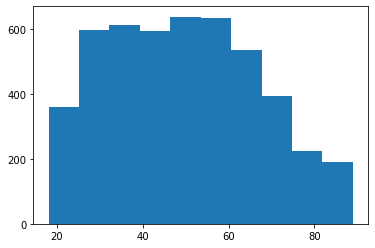

In [61]:
# histograms
gss_data['age'].hist()
plt.grid()
plt.locator_params(nbins=5)
plt.show()

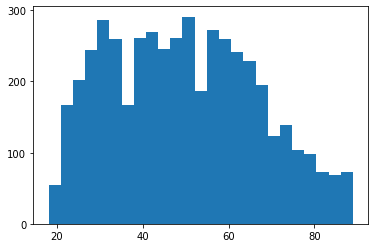

In [65]:
gss_data['age'].hist(bins=25)
plt.grid()
plt.locator_params(nbins=5)
plt.show()

In [66]:
inc_age = gss_data[['realrinc', 'age']]
inc_age.head()

,realrinc,age
id,,
1,NaN,22.0
2,NaN,21.0
3,58800.0,42.0
4,NaN,49.0
5,NaN,70.0


In [67]:
inc_age = gss_data[['realrinc', 'age']].dropna()
inc_age.head(5)

,realrinc,age
id,,
3,58800.0,42.0
10,15925.0,28.0
12,3185.0,36.0
15,7962.5,52.0
16,26950.0,35.0


array([[<AxesSubplot:title={'center':'realrinc'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

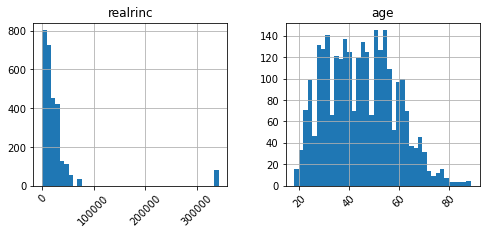

In [74]:
ax_list = inc_age.hist(bins = 40, figsize = (8, 3), xrot = 45)
ax_list

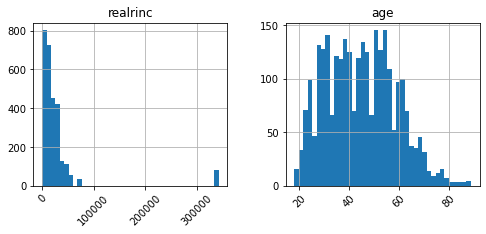

In [75]:
ax_list = inc_age.hist(bins = 40, figsize = (8, 3), xrot = 45)
for ax in ax_list[0]:
    ax.locator_params(axis = 'x', nbins = 6)
    ax.locator_params(axis = 'y', nbins = 6)

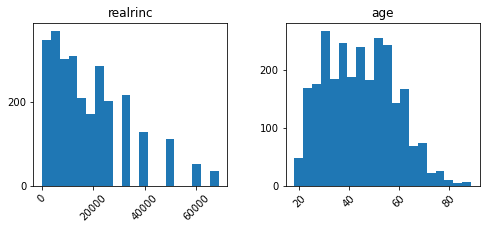

In [79]:
inc_age = gss_data[['realrinc','age']].dropna()
lowinc_age = inc_age[inc_age['realrinc'] < 3.0E5]
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45)

for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x' ,nbins=6)
    ax.locator_params(axis='y' ,nbins=3)

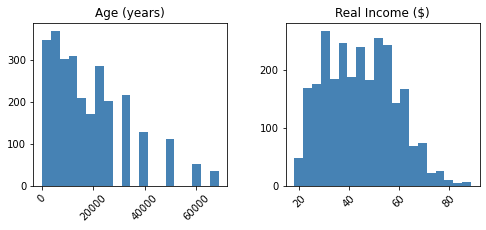

In [80]:
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income ($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x' ,nbins=6)
    ax.locator_params(axis='y' ,nbins=4)

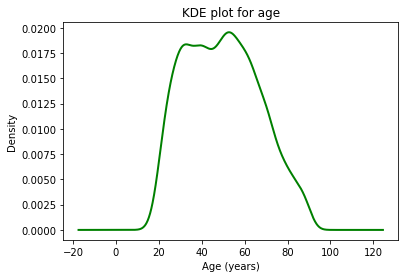

In [82]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw = 2, color = 'green')
plt.title('KDE plot for age')
plt.xlabel('Age (years)');

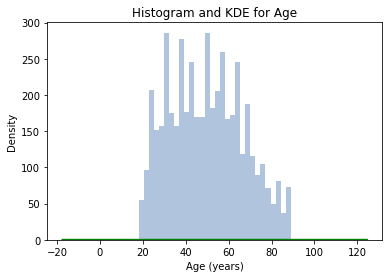

In [90]:
ax = age.hist(bins=30, color='LightSteelBlue', )
age.plot(kind='kde', lw=2, color='Green', ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)');

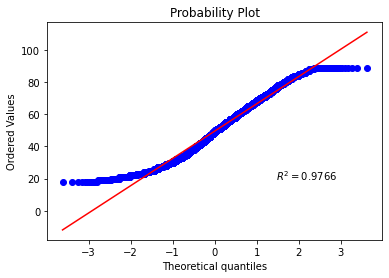

In [94]:
import scipy.stats as stats
stats.probplot(age, dist='norm', plot=plt, fit=True, rvalue=True);